In [1]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\main.csv')

In [3]:
# Get FOMC meetings data

# Option 1: Use read_fomc_data and create a list
fomc_data_1 = read_fomc_data(path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\fomc')
fomc_dates_1 = fomc_data_1['FOMCDate'].to_list()

# Option 2: (Recommended) Use get_fomc_data and create a list
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [4]:
df_fomc = fomc_data_1.copy()
fomc_data_1.head(25)

,FOMCDate,Time,Actual,Forecast,Previous
0,2024-12-18,13:00,NaN,NaN,NaN
1,2024-11-06,13:00,NaN,NaN,NaN
2,2024-09-25,13:00,NaN,NaN,NaN
3,2024-07-31,13:00,NaN,NaN,NaN
4,2024-06-19,13:00,NaN,NaN,NaN
5,2024-05-01,13:00,NaN,NaN,NaN
6,2024-03-20,13:00,NaN,NaN,NaN
7,2024-01-31,13:00,NaN,NaN,NaN
8,2023-12-13,13:00,NaN,NaN,NaN
9,2023-11-01,13:00,NaN,NaN,NaN


### Getting data out

In [5]:
df_fomc['FOMCDate'] = pd.to_datetime(df_fomc['FOMCDate'])

# Extract year, month, and the quarter
df_fomc['year'] = df_fomc['FOMCDate'].dt.year
df_fomc['month'] = df_fomc['FOMCDate'].dt.month
df_fomc['quarter'] = df_fomc['FOMCDate'].dt.quarter.apply(lambda x: f'{x}')

In [6]:
df_fomc

,FOMCDate,Time,Actual,Forecast,Previous,year,month,quarter
0,2024-12-18,13:00,NaN,NaN,NaN,2024,12,4
1,2024-11-06,13:00,NaN,NaN,NaN,2024,11,4
2,2024-09-25,13:00,NaN,NaN,NaN,2024,9,3
3,2024-07-31,13:00,NaN,NaN,NaN,2024,7,3
4,2024-06-19,13:00,NaN,NaN,NaN,2024,6,2
...,...,...,...,...,...,...,...,...
280,1983-03-31,13:00,8.62%,NaN,8.50%,1983,3,1
281,1982-12-14,13:00,8.50%,NaN,9.00%,1982,12,4
282,1982-11-19,13:00,9.00%,NaN,9.50%,1982,11,4
283,1982-10-07,13:00,9.50%,NaN,10.00%,1982,10,4


In [7]:
df_fomc.to_csv('df_fomc.csv', index=False)

- Actual and Forecastis up until (2023-02-01)
- Is Actual same as DFF They seem to be simmilar but different


In [8]:
df[['year', 'quarter', 'month', 'DFF', 'DFF_implied']].tail(10)

,year,quarter,month,DFF,DFF_implied
751,2022,3.0,8,2.33,2.3300
752,2022,3.0,9,3.08,2.5575
753,2022,4.0,10,3.08,3.0800
754,2022,4.0,11,3.83,3.7800
755,2022,4.0,12,4.33,4.1025
756,2023,1.0,1,4.33,4.3300
757,2023,1.0,2,4.57,4.5700
758,2023,1.0,3,4.83,4.6500
759,2023,2.0,4,4.83,4.8300
760,2023,2.0,5,5.08,NaN


In [9]:
fomc_dates_2

['1980-01-09',
 '1980-02-05',
 '1980-03-18',
 '1980-04-22',
 '1980-05-20',
 '1980-07-09',
 '1980-08-12',
 '1980-09-16',
 '1980-10-21',
 '1980-11-18',
 '1980-12-19',
 '1981-02-03',
 '1981-03-31',
 '1981-05-18',
 '1981-07-07',
 '1981-08-18',
 '1981-10-06',
 '1981-11-17',
 '1981-12-22',
 '1982-02-02',
 '1982-03-30',
 '1982-05-18',
 '1982-07-01',
 '1982-08-24',
 '1982-10-05',
 '1982-11-16',
 '1982-12-21',
 '1983-02-09',
 '1983-03-29',
 '1983-05-24',
 '1983-07-13',
 '1983-08-23',
 '1983-10-04',
 '1983-11-15',
 '1983-12-20',
 '1984-01-31',
 '1984-03-27',
 '1984-05-22',
 '1984-07-17',
 '1984-08-21',
 '1984-10-02',
 '1984-11-07',
 '1984-12-18',
 '1985-02-13',
 '1985-03-26',
 '1985-05-21',
 '1985-07-10',
 '1985-08-20',
 '1985-10-01',
 '1985-11-05',
 '1985-12-17',
 '1986-02-12',
 '1986-04-01',
 '1986-05-20',
 '1986-07-09',
 '1986-08-19',
 '1986-09-23',
 '1986-11-05',
 '1986-12-16',
 '1987-02-11',
 '1987-03-31',
 '1987-05-19',
 '1987-07-07',
 '1987-08-18',
 '1987-09-22',
 '1987-11-03',
 '1987-12-

In [10]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ff_range['DFEDTARL'].fillna(ff_range['DFEDTAR'], inplace=True)
c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

,LL,UL
Date,,
2008-12-16,0.0,0.25
2008-12-17,0.0,0.25
2008-12-18,0.0,0.25
2008-12-19,0.0,0.25
2008-12-20,0.0,0.25
...,...,...
2008-12-11,1.0,1.00
2008-12-12,1.0,1.00
2008-12-13,1.0,1.00


In [11]:
sorted_ff_range = ff_range.sort_index()


In [12]:
# sorted_ff_range[15050:]

In [13]:
sorted_ff_range.to_csv('fedwatch_ffrange.csv')

In [14]:
sorted_ff_range[sorted_ff_range.index == '2018-06-14']

,LL,UL
Date,,
2018-06-14,1.75,2.0


In [15]:
sorted_ff_range.tail(320)

,LL,UL
Date,,
2023-05-26,5.00,5.25
2023-05-27,5.00,5.25
2023-05-28,5.00,5.25
2023-05-29,5.00,5.25
2023-05-30,5.00,5.25
...,...,...
2024-04-05,5.25,5.50
2024-04-06,5.25,5.50
2024-04-07,5.25,5.50


what is LL and UL in respective to our data?

- what is openinterest
- what is volume?

In [16]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQJ22', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2019-04-30,98.1050,98.1050,98.1050,98.1050,0,0,ZQJ22
2019-05-01,98.0650,98.0650,98.0650,98.0650,0,0,ZQJ22
2019-05-02,98.0000,98.0000,98.0000,98.0000,0,0,ZQJ22
2019-05-03,98.0050,98.0050,98.0050,98.0050,0,0,ZQJ22
2019-05-06,98.0450,98.0450,98.0450,98.0450,0,0,ZQJ22
...,...,...,...,...,...,...,...
2022-04-25,99.6675,99.6700,99.6675,99.6675,6246,515693,ZQJ22
2022-04-26,99.6675,99.6725,99.6675,99.6700,14986,517171,ZQJ22
2022-04-27,99.6700,99.6725,99.6700,99.6700,2828,515175,ZQJ22


In [17]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQG24', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2020-09-21,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-22,99.995,99.995,99.995,99.995,0,0,ZQG24
2020-09-23,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-24,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-25,99.985,99.985,99.985,99.985,0,0,ZQG24
...,...,...,...,...,...,...,...
2023-09-11,94.590,94.600,94.575,94.575,15685,138405,ZQG24
2023-09-12,94.575,94.590,94.570,94.580,29812,141699,ZQG24
2023-09-13,94.575,94.585,94.515,94.575,56867,145453,ZQG24


In [18]:
ohlc_sample[600:650]

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2023-02-08,95.420,95.420,95.340,95.380,2790,13193,ZQG24
2023-02-09,95.400,95.425,95.315,95.320,2409,12972,ZQG24
2023-02-10,95.335,95.345,95.250,95.275,3286,12416,ZQG24
2023-02-13,95.255,95.270,95.225,95.255,2687,12256,ZQG24
2023-02-14,95.275,95.380,95.080,95.085,5721,12669,ZQG24
2023-02-15,95.095,95.120,95.015,95.090,6071,13902,ZQG24
2023-02-16,95.130,95.155,95.050,95.135,3048,14390,ZQG24
2023-02-17,95.060,95.115,95.020,95.100,4171,14987,ZQG24
2023-02-21,95.075,95.075,94.970,94.985,2331,14828,ZQG24


In [19]:
ohlc_sample[ohlc_sample.index=='2023-04-01']

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,


In [20]:
# Testing FOMC class
fomc1 = fw.fomc.FOMC(watch_date = '1990-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 279)

fomc1.summary

,Contract,Meeting,Order
YYYY-MM,,,
1990-01,ZQF90,No FOMC,0
1990-02,ZQG90,1990-02-07,-1
1990-03,ZQH90,1990-03-27,1
1990-04,ZQJ90,No FOMC,0
1990-05,ZQK90,1990-05-15,2
...,...,...,...
2024-06,ZQM24,2024-06-12,275
2024-07,ZQN24,2024-07-31,276
2024-08,ZQQ24,No FOMC,0


In [21]:
fomc1.summary.to_csv('fomc_summary.csv')

In [22]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '1990-01-01',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 9)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
1990-01,ZQF90,No FOMC,0
1990-02,ZQG90,1990-02-07,1
1990-03,ZQH90,1990-03-27,2
1990-04,ZQJ90,No FOMC,0
1990-05,ZQK90,1990-05-15,3
1990-06,ZQM90,No FOMC,0
1990-07,ZQN90,1990-07-03,4
1990-08,ZQQ90,1990-08-21,5
1990-09,ZQU90,No FOMC,0


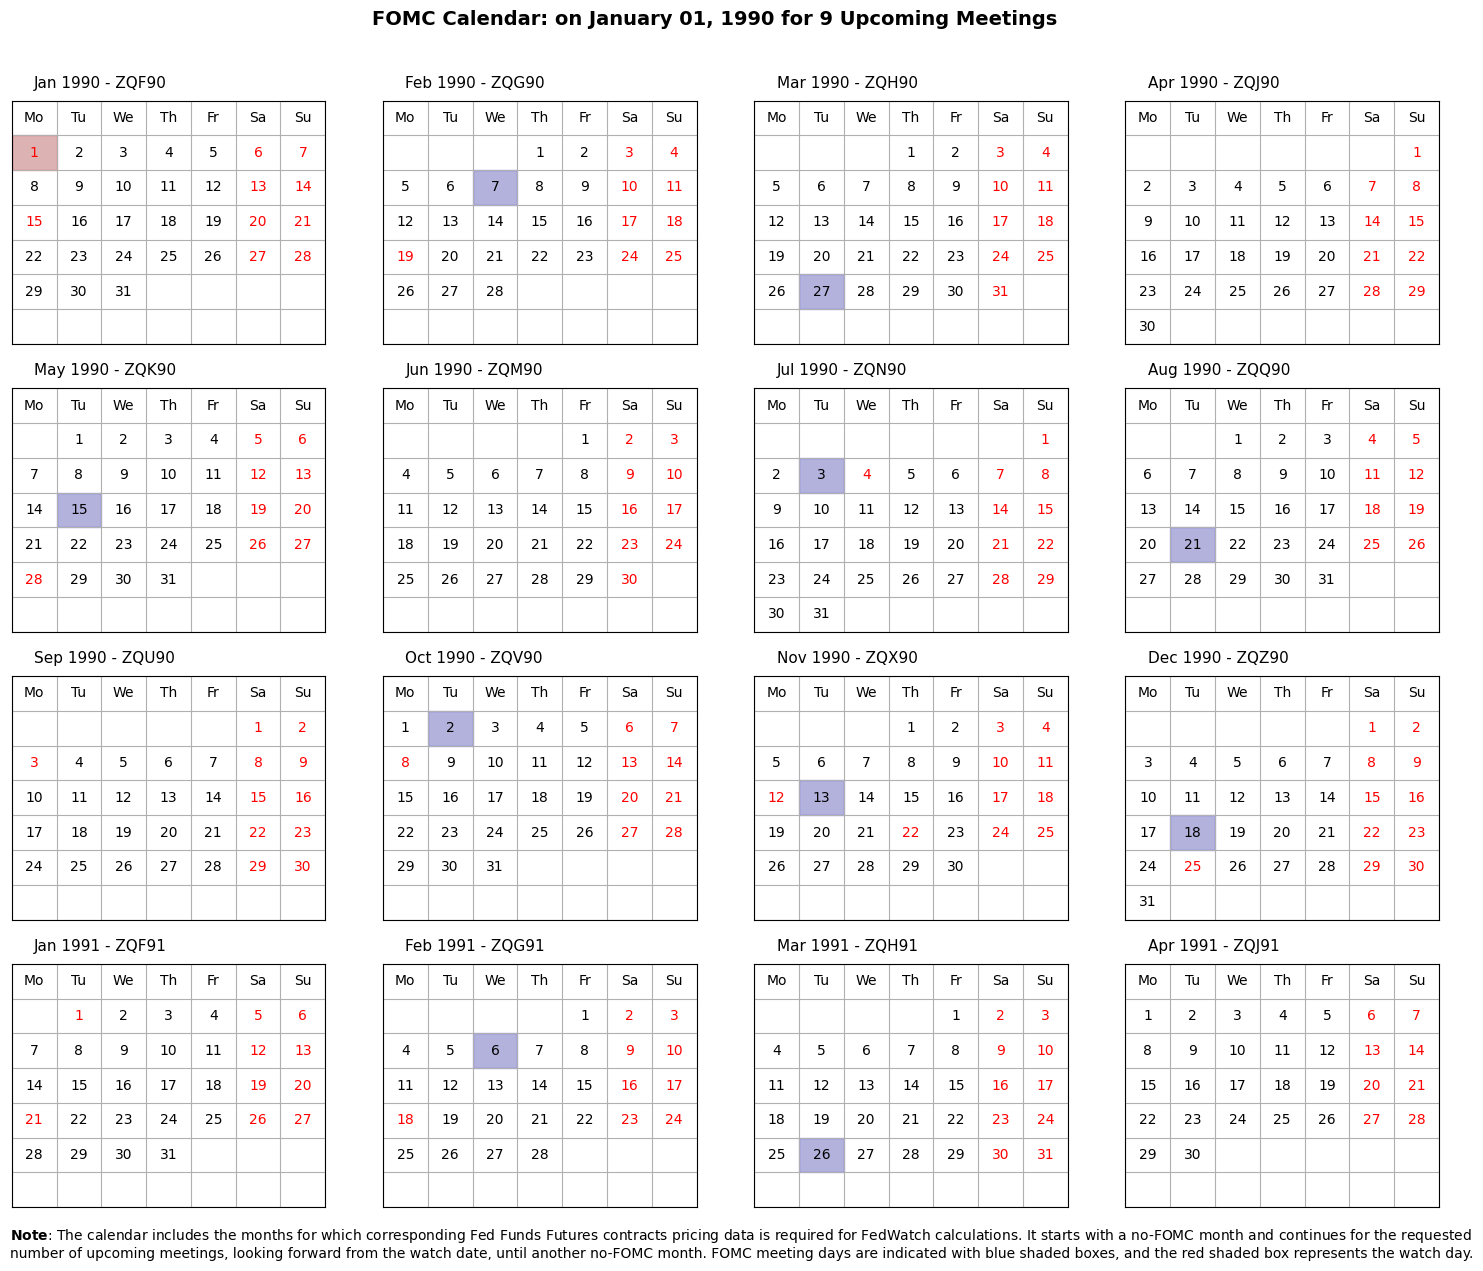

In [23]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [24]:
# Calculate rate expectations
fedwatch3 = fw.fedwatch.FedWatch(watch_date = '2002-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t3 = fedwatch3.generate_hike_info(rate_cols=True)
t3

1.50      1.75      2.00      2.25      2.50  \
WatchDate  FOMCDate                                                       
2002-01-01 2002-01-30  0.320690  0.679310  0.000000  0.000000  0.000000   
           2002-03-19  0.314276  0.672138  0.013586  0.000000  0.000000   
           2002-05-07  0.059084  0.381554  0.548330  0.011032  0.000000   
           2002-06-26  0.013707  0.133897  0.420246  0.423677  0.008473   
           2002-08-13  0.000000  0.013707  0.133897  0.420246  0.423677   

                           2.75          3.00  
WatchDate  FOMCDate                            
2002-01-01 2002-01-30  0.000000  0.000000e+00  
           2002-03-19  0.000000  0.000000e+00  
           2002-05-07  0.000000  0.000000e+00  
           2002-06-26  0.000000  0.000000e+00  
           2002-08-13  0.008473  4.816102e-16

In [25]:
# # Calculate rate expectations
# fedwatch6 = fw.fedwatch.FedWatch(watch_date = '1990-01-01',
#                                 fomc_dates = fomc_dates_2,
#                                 num_upcoming = 20,
#                                 user_func = read_price_history,
#                                 path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
# t6 = fedwatch6.generate_hike_info(rate_cols=True)
# t6

In [26]:
# Calculate rate expectations
fedwatch = fw.fedwatch.FedWatch(watch_date = '2009-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 2,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t1 = fedwatch.generate_hike_info(rate_cols=True)
t1

0.00-0.25  0.25-0.50  0.50-0.75
WatchDate  FOMCDate                                   
2009-01-01 2009-01-29   0.911429   0.088571   0.000000
           2009-03-18   0.809869   0.180261   0.009869

In [27]:
fedwatch2 = fw.fedwatch.FedWatch(watch_date = '2002-02-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t2 = fedwatch2.generate_hike_info(rate_cols=True)
t2

1.75      2.00      2.25      2.50      2.75  \
WatchDate  FOMCDate                                                       
2002-02-01 2002-03-19  0.000000  0.000000  0.000000  0.000000  0.000000   
           2002-05-07  0.464000  0.536000  0.000000  0.000000  0.000000   
           2002-06-26  0.118784  0.482432  0.398784  0.000000  0.000000   
           2002-08-13  0.035325  0.226930  0.457556  0.280189  0.000000   
           2002-09-24  0.000000  0.034711  0.223598  0.453545  0.283274   

                           3.00  
WatchDate  FOMCDate              
2002-02-01 2002-03-19  0.000000  
           2002-05-07  0.000000  
           2002-06-26  0.000000  
           2002-08-13  0.000000  
           2002-09-24  0.004873

### Since we know the watch date affects the probability range, lets take the predictions from 3months prior the date and a month prior. 

#############################################################2#############################################################################################

best working stratergy (num_upcoming=2,  next_month = (watch_date_dt + pd.DateOffset(months=0)).replace(day=1)
        watch_date = (next_month + pd.DateOffset(months=2)).strftime('%Y-%m-%d'))

In [28]:
# import pandas as pd

# # Initialize variables
# watch_date = '2008-01-01'
# three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True
# while continue_loop:
#     # Initialize FedWatch with the current watch_date
#     fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                     fomc_dates=fomc_dates_2,
#                                     num_upcoming=3,
#                                     user_func=read_price_history,
#                                     path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
#     # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     # Check if the DataFrame is not empty
#     if not current_batch_df.empty:
#         # Append the current batch's results to the aggregated DataFrame
#         three_months_5 = pd.concat([three_months_5, current_batch_df])

#         # Regardless of the number of dates fetched, proceed to increment watch_date by four months
#         watch_date_dt = pd.to_datetime(watch_date)
#         next_month = (watch_date_dt + pd.DateOffset(months=1)).replace(day=1)
#         watch_date = (next_month + pd.DateOffset(months=3)).strftime('%Y-%m-%d')

#     else:
#         # If the current batch is empty, stop the loop
#         continue_loop = False


In [29]:
# df_5_final = three_months_5.reset_index()
# print(len(df_5_final))
# df_5_final.head(10)

In [30]:


# # Now, drop the 'WatchDate' column since it's no longer part of the index but a regular column
# df_5_dropped = df_5_reset.drop('WatchDate', axis=1)

# # Optionally, set 'FOMCDate' as the new index if that's your desired structure
# df_5_final = df_5_dropped.set_index('FOMCDate')


In [31]:
# df_5_final.columns

In [32]:
# import pandas as pd
# import numpy as np

# # Assuming df is your DataFrame with the columns listed

# # First, ensure that all range columns exist and are initialized properly.
# # If any range columns don't exist, you can create them with default values (e.g., 0 or NaN)
# # For this example, let's assume all range columns exist and are initialized.

# # Map specific rate columns to their range columns
# # This is a simplified example. Expand this mapping as needed.
# column_mappings = {
#     '0.75':'0.75-1.00',
#     '1.00':'1.00-1.25',
#     '1.25':'1.25-1.50',
#     '1.75':'1.75-2.00', 
#     '2.00':'2.00-2.25',
#     '2.25':'2.25-2.50',
#     '2.50':'2.50-2.75',
#     '2.75':'2.75-3.00',
#     '3.25':'3.25-3.50',
#     '3.50':'3.50-3.75',
#     '3.75':'3.75-4.00',
#     '4.00':'4.00-4.25',
#     '4.25':'4.25-4.50',
#     '4.50':'4.50-4.75',
#     '4.75':'4.75-5.00',
#     '5.00': '5.00-5.25',
#     '5.25': '5.25-5.50',
#     '5.50':'5.50-5.75',
#     '6.00':'6.00-6.25',
#     '6.25':'6.25-6.50',
#     '6.50':'6.50-6.75',
#     '6.75':'6.75-7.00',
#     '7.00':'7.00-7.25',
#     '7.75':'7.75-8.00',
#     '8.00':'8.00-8.25',
#     '8.25':'8.25-8.50',
#     '8.50':'8.50-8.75',
#     '8.75':'8.75-9.00',
#     '9.00':'9.00-9.25'
# }

# # Iterate over the mapping and aggregate values
# for src_col, dest_col in column_mappings.items():
#     # Check if the destination column exists, if not, create it
#     if dest_col not in df_5_final.columns:
#         df_5_final[dest_col] = 0  # or np.nan, depending on how you want to initialize it

#     # Aggregate the source column into the destination column, handling NaN values
#     # Ensure both src_col and the next rate that belongs to the range are included
#     # This example only shows direct mapping; you might sum multiple columns for a single range
#     df_5_final[dest_col] = df_5_final[dest_col].fillna(0) + df_5_final[src_col].fillna(0)

# # After processing, you may want to drop the original rate columns if they are no longer needed
# df_5_final.drop(columns=['7.75', '8.00', '8.25', '8.50', '8.75', '9.00', '6.50', '6.75', '7.00',
#        '5.50', '5.75', '6.00', '4.00', '4.25', '5.25', '3.75', '3.50', '3.00',
#        '3.25', '2.75', '4.50', '4.75', '5.00', '6.25', '1.50', '1.75', '2.00',
#        '2.25', '1.25', '0.75', '1.00', '2.50'], inplace=True)


In [33]:
# df_5_final.head(5)

In [34]:
# len(df_5_final)

In [35]:
# df_5_final.head(10)

In [36]:
# df_5_final.to_csv('final_pyfed.csv', index=False)

03.04

In [37]:
# import pandas as pd

# # Initialize variables
# watch_date = '1991-01-01'
# three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True
# while continue_loop:
#     # Initialize FedWatch with the current watch_date
#     fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                     fomc_dates=fomc_dates_2,
#                                     num_upcoming=2,
#                                     user_func=read_price_history,
#                                     path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
#     # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     # Check if the DataFrame is not empty
#     if not current_batch_df.empty:
#         # Append the current batch's results to the aggregated DataFrame
#         three_months_5 = pd.concat([three_months_5, current_batch_df])

#         # Increment watch_date by one day
#         watch_date_dt = pd.to_datetime(watch_date)
#         watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

#     else:
#         # If the current batch is empty, stop the loop
#         continue_loop = False


In [38]:
# three_months_5

In [39]:
# import pandas as pd

# # Initialize variables
# watch_date = '1991-01-01'
# three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True
# while continue_loop:
#     try:
#         fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                         fomc_dates=fomc_dates_2,
#                                         num_upcoming=2,
#                                         user_func=read_price_history,
#                                         path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
        
#         if not current_batch_df.empty:
#             three_months_5 = pd.concat([three_months_5, current_batch_df])
#     except Exception as e:
#         print(f"Error on {watch_date} generating hike info: {e}")
#         # Consider logging the error or handling specific cases differently

#     # Increment watch_date by one day
#     watch_date_dt = pd.to_datetime(watch_date)
#     watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

#     # Optionally, add a condition to break the loop if it runs for an unexpected number of iterations
#     if watch_date_dt.year > 1990:  # Example condition to prevent infinite loops
#         continue_loop = False


In [40]:
# three_months_5

# Working 04.04

In [41]:
import pandas as pd

# Initialize variables
watch_date = '2008-01-01'
three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True
while continue_loop:
    try:
        print(f"Processing date: {watch_date}")  # Log the current date being processed
        fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                        fomc_dates=fomc_dates_2,
                                        num_upcoming=3,
                                        user_func=read_price_history,
                                        path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
        
        if not current_batch_df.empty:
            three_months_5 = pd.concat([three_months_5, current_batch_df])
    except IndexError as e:
        print(f"IndexError on {watch_date}: {e}")
    except Exception as e:
        print(f"Unhandled error on {watch_date}: {e}")
        continue_loop = False
        break
    finally:
        # Increment watch_date by one day regardless of errors
        watch_date_dt = pd.to_datetime(watch_date)
        watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        if watch_date_dt >= pd.to_datetime('2024-01-01'):
            continue_loop = False


Processing date: 2008-01-01


Processing date: 2008-01-02
Processing date: 2008-01-03
Processing date: 2008-01-04
Processing date: 2008-01-05
Processing date: 2008-01-06
Processing date: 2008-01-07
Processing date: 2008-01-08
Processing date: 2008-01-09
Processing date: 2008-01-10
Processing date: 2008-01-11
Processing date: 2008-01-12
Processing date: 2008-01-13
Processing date: 2008-01-14
Processing date: 2008-01-15
Processing date: 2008-01-16
Processing date: 2008-01-17
Processing date: 2008-01-18
Processing date: 2008-01-19
Processing date: 2008-01-20
Processing date: 2008-01-21
Processing date: 2008-01-22
Processing date: 2008-01-23
Processing date: 2008-01-24
Processing date: 2008-01-25
Processing date: 2008-01-26
Processing date: 2008-01-27
Processing date: 2008-01-28
Processing date: 2008-01-29
Processing date: 2008-01-30
Processing date: 2008-01-31
Processing date: 2008-02-01
Processing date: 2008-02-02
Processing date: 2008-02-03
Processing date: 2008-02-04
Processing date: 2008-02-05
Processing date: 200

In [42]:
three_months_5

3.50      3.75      4.00      4.25  3.25  3.00  \
WatchDate  FOMCDate                                                         
2008-01-01 2008-01-30  0.000000  0.000000  0.598621  0.401379   NaN   NaN   
           2008-03-18  0.000000  0.382292  0.472658  0.145050   NaN   NaN   
           2008-04-30  0.245194  0.440251  0.262537  0.052018   NaN   NaN   
2008-01-02 2008-01-30  0.000000  0.000000  0.940690  0.059310   NaN   NaN   
           2008-03-18  0.000000  0.729845  0.256861  0.013294   NaN   NaN   
...                         ...       ...       ...       ...   ...   ...   
2023-12-31 2024-03-20       NaN       NaN       NaN       NaN   NaN   NaN   
           2024-05-01       NaN       NaN       NaN       NaN   NaN   NaN   
2024-01-01 2024-01-31       NaN       NaN       NaN       NaN   NaN   NaN   
           2024-03-20       NaN       NaN       NaN       NaN   NaN   NaN   
           2024-05-01       NaN       NaN       NaN       NaN   NaN   NaN   

                       2.75  2.50  1.75  2.00  ...  3.75-4.00  4.00-4.25  \
WatchDate  FOMCDate                            ...                         
2008-01-01 2008-01-30   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2008-03-18   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2008-04-30   NaN   NaN   NaN   NaN  ...        NaN        NaN   
2008-01-02 2008-01-30   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2008-03-18   NaN   NaN   NaN   NaN  ...        NaN        NaN   
...                     ...   ...   ...   ...  ...        ...        ...   
2023-12-31 2024-03-20   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-05-01   NaN   NaN   NaN   NaN  ...        NaN        NaN   
2024-01-01 2024-01-31   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-03-20   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-05-01   NaN   NaN   NaN   NaN  ...        NaN        NaN   

                       4.25-4.50  4.50-4.75  4.75-5.00  5.00-5.25  5.25-5.50  \
WatchDate  FOMCDate                                                            
2008-01-01 2008-01-30        NaN        NaN        NaN        NaN        NaN   
           2008-03-18        NaN        NaN        NaN        NaN        NaN   
           2008-04-30        NaN        NaN        NaN        NaN        NaN   
2008-01-02 2008-01-30        NaN        NaN        NaN        NaN        NaN   
           2008-03-18        NaN        NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...        ...   
2023-12-31 2024-03-20        NaN    0.00000   0.013640    0.25472   0.731640   
           2024-05-01        NaN    0.00473   0.097244    0.42011   0.477916   
2024-01-01 2024-01-31        NaN    0.00000   0.000000    0.06200   0.938000   
           2024-03-20        NaN    0.00000   0.013640    0.25472   0.731640   
           2024-05-01        NaN    0.00473   0.097244    0.42011   0.477916   

                       5.50-5.75  5.75-6.00  6.00-6.25  
WatchDate  FOMCDate                                     
2008-01-01 2008-01-30        NaN        NaN        NaN  
           2008-03-18        NaN        NaN        NaN  
           2008-04-30        NaN        NaN        NaN  
2008-01-02 2008-01-30        NaN        NaN        NaN  
           2008-03-18        NaN        NaN        NaN  
...                          ...        ...        ...  
2023-12-31 2024-03-20        NaN        NaN        NaN  
           2024-05-01        NaN        NaN        NaN  
2024-01-01 2024-01-31        NaN        NaN        NaN  
           2024-03-20        NaN        NaN        NaN  
           2024-05-01        NaN        NaN        NaN  

[17470 rows x 48 columns]

In [43]:
df_5_final = three_months_5.reset_index()
print(len(df_5_final))
df_5_final.head(10)

17470


,WatchDate,FOMCDate,3.50,3.75,4.00,4.25,3.25,3.00,2.75,2.50,...,3.75-4.00,4.00-4.25,4.25-4.50,4.50-4.75,4.75-5.00,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00,6.00-6.25
0,2008-01-01,2008-01-30,0.000000,0.000000,0.598621,0.401379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-01,2008-03-18,0.000000,0.382292,0.472658,0.145050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-01-01,2008-04-30,0.245194,0.440251,0.262537,0.052018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-01-02,2008-01-30,0.000000,0.000000,0.940690,0.059310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-01-02,2008-03-18,0.000000,0.729845,0.256861,0.013294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-01-02,2008-04-30,0.528509,0.387339,0.080485,0.003667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2008-01-03,2008-01-30,0.000000,0.047586,0.952414,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008-01-03,2008-03-18,0.039743,0.803273,0.156984,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008-01-03,2008-04-30,0.608441,0.321899,0.040058,NaN,0.029601,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-01-04,2008-01-30,0.000000,0.325517,0.674483,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_5_final.to_csv('datafor3meetings2008.csv', index=False)

Latest code

In [101]:
import pandas as pd

# Initialize variables
watch_date = '1991-01-01'
three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True
while continue_loop:
    try:
        print(f"Processing date: {watch_date}")  # Log the current date being processed
        fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                        fomc_dates=fomc_dates_2,
                                        num_upcoming=2,
                                        user_func=read_price_history,
                                        path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
        
        if not current_batch_df.empty:
            three_months_5 = pd.concat([three_months_5, current_batch_df])
    except IndexError as e:
        print(f"IndexError on {watch_date}: {e}")
    except Exception as e:
        print(f"Unhandled error on {watch_date}: {e}")
        continue_loop = False
        break
    finally:
        # Increment watch_date by one day regardless of errors
        watch_date_dt = pd.to_datetime(watch_date)
        watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        # Adjust this condition to keep processing until 2024-01-01
        if watch_date_dt >= pd.to_datetime('2024-01-01'):
            continue_loop = False


Processing date: 1991-01-01
Processing date: 1991-01-02
Processing date: 1991-01-03
Processing date: 1991-01-04
Processing date: 1991-01-05
Processing date: 1991-01-06
Processing date: 1991-01-07
Processing date: 1991-01-08
Processing date: 1991-01-09
Processing date: 1991-01-10
Processing date: 1991-01-11
Processing date: 1991-01-12
Processing date: 1991-01-13
Processing date: 1991-01-14
Processing date: 1991-01-15
Processing date: 1991-01-16
Processing date: 1991-01-17
Processing date: 1991-01-18
Processing date: 1991-01-19
Processing date: 1991-01-20
Processing date: 1991-01-21
Processing date: 1991-01-22
Processing date: 1991-01-23
Processing date: 1991-01-24
Processing date: 1991-01-25
Processing date: 1991-01-26
Processing date: 1991-01-27
Processing date: 1991-01-28
Processing date: 1991-01-29
Processing date: 1991-01-30
Processing date: 1991-01-31
Processing date: 1991-02-01
Processing date: 1991-02-02
Processing date: 1991-02-03
Processing date: 1991-02-04
Processing date: 199

In [103]:
three_months_5.to_csv('bestyet.csv', index=False)

In [37]:
# import pandas as pd
# import numpy as np

# # Assuming df is your DataFrame with the columns listed

# # First, ensure that all range columns exist and are initialized properly.
# # If any range columns don't exist, you can create them with default values (e.g., 0 or NaN)
# # For this example, let's assume all range columns exist and are initialized.

# # Map specific rate columns to their range columns
# # This is a simplified example. Expand this mapping as needed.
# column_mappings = {
#     '0.50':'0.50-0.75',
#     '0.75':'0.75-1.00',
#     '1.00':'1.00-1.25',
#     '1.25':'1.25-1.50',
#     '1.75':'1.75-2.00', 
#     '2.00':'2.00-2.25',
#     '2.25':'2.25-2.50',
#     '2.50':'2.50-2.75',
#     '2.75':'2.75-3.00',
#     '3.25':'3.25-3.50',
#     '3.50':'3.50-3.75',
#     '3.75':'3.75-4.00',
#     '4.00':'4.00-4.25',
#     '4.25':'4.25-4.50',
#     '4.50':'4.50-4.75',
#     '4.75':'4.75-5.00',
#     '5.00': '5.00-5.25',
#     '5.25': '5.25-5.50',
#     '5.50':'5.50-5.75',
#     '6.00':'6.00-6.25',
#     '6.25':'6.25-6.50',
#     '6.50':'6.50-6.75',
#     '6.75':'6.75-7.00',
#     '7.00':'7.00-7.25',
#     '7.25':'7.25-7.50',
#     '7.75':'7.75-8.00',
#     '8.00':'8.00-8.25',
#     '8.25':'8.25-8.50',
#     '8.50':'8.50-8.75',
#     '8.75':'8.75-9.00',
#     '9.00':'9.00-9.25'
# }

# # Iterate over the mapping and aggregate values
# for src_col, dest_col in column_mappings.items():
#     # Check if the destination column exists, if not, create it
#     if dest_col not in df.columns:
#         df_5_final[dest_col] = 0  # or np.nan, depending on how you want to initialize it

#     # Aggregate the source column into the destination column, handling NaN values
#     # Ensure both src_col and the next rate that belongs to the range are included
#     # This example only shows direct mapping; you might sum multiple columns for a single range
#     df_5_final[dest_col] = df_5_final[dest_col].fillna(0) + df_5_final[src_col].fillna(0)

# # After processing, you may want to drop the original rate columns if they are no longer needed
# df_5_final.drop(columns=['7.75', '8.00', '8.25', '8.50', '8.75', '9.00', '6.50', '6.75', '7.00',
#        '5.50', '5.75', '6.00', '4.00', '4.25', '5.25', '3.75', '3.50', '3.00',
#        '3.25', '2.75', '4.50', '4.75', '5.00', '6.25', '1.50', '1.75', '2.00',
#        '2.25', '1.25', '0.75', '1.00',], inplace=True)


In [38]:
import pandas as pd

# Initialize variables
watch_date = '1990-01-01'
three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True
while continue_loop:
    # Initialize FedWatch with the current watch_date
    fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=2,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
    try:
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
    except Exception as e:
        print(f"Error generating hike info: {e}")
        continue_loop = False
        break

    # Check if the DataFrame is not empty and if it contains new data
    if not current_batch_df.empty:
        # Logic to check if the data is new before appending
        if not current_batch_df.equals(three_months_5.tail(len(current_batch_df))):
            three_months_5 = pd.concat([three_months_5, current_batch_df])

    # Increment watch_date by one day
    watch_date_dt = pd.to_datetime(watch_date)
    watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')


Error generating hike info: single positional indexer is out-of-bounds


In [39]:
# import pandas as pd
# from tqdm import tqdm

# # Initialize variables
# watch_date = '1990-01-01'
# end_date = '2024-01-01'  # Define the end date for the loop
# aggregated_results = pd.DataFrame()  # DataFrame to hold aggregated results

# def has_new_information(new_data, aggregated_data):
#     """Check if the new_data has different information than the last entry in aggregated_data."""
#     if aggregated_data.empty:
#         return True
#     last_entry = aggregated_data.iloc[-1]
#     for column in new_data.columns:
#         if column in aggregated_data.columns and new_data[column].iloc[0] != last_entry[column]:
#             return True
#     return False

# # Initialize tqdm progress bar without a total since the end condition is known
# total_days = pd.to_datetime(end_date) - pd.to_datetime(watch_date)
# total_days = total_days.days
# pbar = tqdm(total=total_days)
# pbar.set_description(f"Processing watch date: {watch_date}")

# while watch_date != end_date:
#     # Update the progress bar description with the current watch date
#     pbar.set_description(f"Processing watch date: {watch_date}")
#     pbar.update(1)  # Update the progress bar by one iteration
    
#     try:
#         # Assume fedwatch.generate_hike_info(rate_cols=True) fetches data for the current watch_date
#         # This function is hypothetical and not defined in the provided code
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         # Continue to the next day even in case of an error
#         # continue_loop = False  # Remove this line to ensure loop continues

#     if not current_batch_df.empty:
#         # Check if the current batch's results are different from the last stored results
#         if has_new_information(current_batch_df, aggregated_results):
#             aggregated_results = pd.concat([aggregated_results, current_batch_df]).drop_duplicates()
        
#     # Increment watch_date by one day regardless of new information or empty batch
#     watch_date_dt = pd.to_datetime(watch_date)
#     watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

# pbar.close()  # Close the progress bar when the loop is finished


In [40]:
# import pandas as pd
# from tqdm import tqdm

# # Initialize variables
# watch_date = '1990-01-01'
# aggregated_results = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True

# def has_new_information(new_data, aggregated_data):
#     """Check if the new_data has different information than the last entry in aggregated_data."""
#     if aggregated_data.empty:
#         return True
#     last_entry = aggregated_data.iloc[-1]
#     for column in new_data.columns:
#         if column in aggregated_data.columns and new_data[column].iloc[0] != last_entry[column]:
#             return True
#     return False

# # Initialize tqdm progress bar without a total since the end condition is unknown
# pbar = tqdm()
# pbar.set_description(f"Processing watch date: {watch_date}")

# while continue_loop:
#     # Update the progress bar description with the current watch date
#     pbar.set_description(f"Processing watch date: {watch_date}")
#     pbar.update(1)  # Update the progress bar by one iteration
    
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     if not current_batch_df.empty:
#         # Check if the current batch's results are different from the last stored results
#         if has_new_information(current_batch_df, aggregated_results):
#             aggregated_results = pd.concat([aggregated_results, current_batch_df]).drop_duplicates()
        
#         # Increment watch_date by one day
#         watch_date_dt = pd.to_datetime(watch_date)
#         watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
#     else:
#         continue_loop = False

# pbar.close()  # Close the progress bar when the loop is finished


In [41]:
# import pandas as pd
# from tqdm import tqdm

# # Initialize variables
# watch_date = '1990-01-01'
# aggregated_results = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True

# def has_new_information(new_data, aggregated_data):
#     """Check if the new_data has different information than the last entry in aggregated_data."""
#     if aggregated_data.empty:
#         return True
#     # Compare the relevant columns of the new data with the last entry in the aggregated data
#     # This is a simplified example; you may need to adjust the logic based on your exact needs
#     last_entry = aggregated_data.iloc[-1]
#     for column in new_data.columns:
#         if column in aggregated_data.columns and new_data[column].iloc[0] != last_entry[column]:
#             return True
#     return False

# # Since the end condition is not known, use manual control with tqdm
# pbar = tqdm()
# pbar.set_description("Processing watch dates")

# while continue_loop:
#     pbar.update(1)  # Update the progress bar by one iteration
#     # Assuming fw.fedwatch.FedWatch(...) is correctly initialized and works as expected
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     if not current_batch_df.empty:
#         # Check if the current batch's results are different from the last stored results
#         if has_new_information(current_batch_df, aggregated_results):
#             aggregated_results = pd.concat([aggregated_results, current_batch_df]).drop_duplicates()
        
#         # Increment watch_date by one day
#         watch_date_dt = pd.to_datetime(watch_date)
#         watch_date = (watch_date_dt + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
#     else:
#         continue_loop = False

# pbar.close()  # Close the progress bar when the loop is finished


##########################################11.03########################################

In [42]:
import pandas as pd

# Initialize variables
watch_date = '1990-01-01'
three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True

while continue_loop:
    # Initialize FedWatch with the current watch_date
    fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=2,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
    try:
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
    except Exception as e:
        print(f"Error generating hike info: {e}")
        continue_loop = False
        break

    # Check if the DataFrame is not empty
    if not current_batch_df.empty:
        # Append the current batch's results to the aggregated DataFrame
        three_months_5 = pd.concat([three_months_5, current_batch_df], ignore_index=True)

        # Increment watch_date by one day
        watch_date_dt = pd.to_datetime(watch_date)
        next_day = (watch_date_dt + pd.DateOffset(days=1))
        watch_date = (next_day + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    else:
        # If the current batch is empty, stop the loop
        continue_loop = False


Error generating hike info: single positional indexer is out-of-bounds


In [43]:
# Calculate rate expectations
fedwatch6 = fw.fedwatch.FedWatch(watch_date = '2010-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t6 = fedwatch6.generate_hike_info(rate_cols=True)
t6

0.00-0.25  0.25-0.50  0.50-0.75  0.75-1.00  1.00-1.25  \
WatchDate  FOMCDate                                                            
2010-01-01 2010-01-27   0.880769   0.119231   0.000000   0.000000   0.000000   
           2010-03-16   0.732017   0.247846   0.020137   0.000000   0.000000   
           2010-04-28   0.504278   0.398477   0.090980   0.006265   0.000000   
           2010-06-24   0.171455   0.468306   0.293928   0.062177   0.004135   
           2010-08-10   0.051436   0.260510   0.415993   0.224403   0.044764   

                       1.25-1.50  
WatchDate  FOMCDate               
2010-01-01 2010-01-27   0.000000  
           2010-03-16   0.000000  
           2010-04-28   0.000000  
           2010-06-24   0.000000  
           2010-08-10   0.002894

In [44]:

# Starting date
watch_date_dt = pd.to_datetime('2010-01-01')

# Calculate the date two days later
watch_date = (watch_date_dt + pd.DateOffset(days=2)).strftime('%Y-%m-%d')

# Assuming fomc_dates_2 and read_price_history are defined elsewhere in your code

# Initialize FedWatch with the calculated watch_date
fedwatch6 = fw.fedwatch.FedWatch(watch_date=watch_date,
                                 fomc_dates=fomc_dates_2,
                                 num_upcoming=5,
                                 user_func=read_price_history,
                                 path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')

# Generate hike info
t6 = fedwatch6.generate_hike_info(rate_cols=True)

# Assuming you want to return or print the result
t6


0.00-0.25  0.25-0.50  0.50-0.75  0.75-1.00  1.00-1.25  \
WatchDate  FOMCDate                                                            
2010-01-03 2010-01-27   0.880769   0.119231   0.000000   0.000000   0.000000   
           2010-03-16   0.732017   0.247846   0.020137   0.000000   0.000000   
           2010-04-28   0.504278   0.398477   0.090980   0.006265   0.000000   
           2010-06-24   0.171455   0.468306   0.293928   0.062177   0.004135   
           2010-08-10   0.051436   0.260510   0.415993   0.224403   0.044764   

                       1.25-1.50  
WatchDate  FOMCDate               
2010-01-03 2010-01-27   0.000000  
           2010-03-16   0.000000  
           2010-04-28   0.000000  
           2010-06-24   0.000000  
           2010-08-10   0.002894

# 03.04

In [51]:

# Validate and sort FOMC dates
fomc_dates_2 = sorted(list(set([date for date in fomc_dates_2 if isinstance(date, str) and len(date) == 10])))


# 19.03

In [45]:
# Calculate rate expectations
fedwatch7 = fw.fedwatch.FedWatch(watch_date = '2002-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t7 = fedwatch7.generate_hike_info(rate_cols=True)
t7

1.50      1.75      2.00      2.25      2.50  \
WatchDate  FOMCDate                                                       
2002-01-01 2002-01-30  0.320690  0.679310  0.000000  0.000000  0.000000   
           2002-03-19  0.314276  0.672138  0.013586  0.000000  0.000000   
           2002-05-07  0.059084  0.381554  0.548330  0.011032  0.000000   
           2002-06-26  0.013707  0.133897  0.420246  0.423677  0.008473   
           2002-08-13  0.000000  0.013707  0.133897  0.420246  0.423677   

                           2.75          3.00  
WatchDate  FOMCDate                            
2002-01-01 2002-01-30  0.000000  0.000000e+00  
           2002-03-19  0.000000  0.000000e+00  
           2002-05-07  0.000000  0.000000e+00  
           2002-06-26  0.000000  0.000000e+00  
           2002-08-13  0.008473  4.816102e-16

In [46]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta


# def generate_forecasts(watch_date, fomc_dates, path):
#     # Generate a list of dates from watch_date to today
#     start_date = datetime.strptime(watch_date, '%Y-%m-%d')
#     end_date = datetime.today()
#     delta = timedelta(days=1)
#     dates = pd.date_range(start=start_date, end=end_date, freq='D')

#     # Initialize an empty DataFrame to store forecast results
#     forecasts = pd.DataFrame()

#     for current_date in dates:
#         # Create FedWatch instance for the current date
#         fedwatch = fw.fedwatch.FedWatch(watch_date=current_date.strftime('%Y-%m-%d'),
#                                         fomc_dates=fomc_dates,
#                                         num_upcoming=2,  # Adjust to generate forecast for every 2 upcoming meetings
#                                         user_func=read_price_history,
#                                         path=path)
#         # Generate hike info and append to the DataFrame
#         hike_info = fedwatch.generate_hike_info(rate_cols=True)
#         hike_info['watch_date'] = current_date  # Add current watch_date to the hike info
#         forecasts = pd.concat([forecasts, hike_info])

#     return forecasts.reset_index(drop=True)

# # Example usage
# # Assuming fomc_dates_2 and path are defined elsewhere
# forecast_df = generate_forecasts('2002-01-01', fomc_dates_2, r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
# forecast_df


In [47]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for progress reporting

def generate_forecasts(watch_date, fomc_dates, path):
    # Generate a list of dates from watch_date to today
    start_date = datetime.strptime(watch_date, '%Y-%m-%d')
    end_date = datetime.today()
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Initialize an empty DataFrame to store forecast results
    forecasts = pd.DataFrame()

    # Use tqdm to show progress
    for current_date in tqdm(dates, desc="Generating forecasts"):
        # Create FedWatch instance for the current date
        fedwatch = fw.fedwatch.FedWatch(watch_date=current_date.strftime('%Y-%m-%d'),
                                        fomc_dates=fomc_dates,
                                        num_upcoming=2,  # Adjust to generate forecast for every 2 upcoming meetings
                                        user_func=read_price_history,
                                        path=path)
        # Generate hike info and append to the DataFrame
        hike_info = fedwatch.generate_hike_info(rate_cols=True)
        hike_info['watch_date'] = current_date  # Add current watch_date to the hike info
        forecasts = pd.concat([forecasts, hike_info])

    return forecasts.reset_index(drop=True)

# Example usage
# Assuming fomc_dates_2 and path are defined elsewhere
forecast_df = generate_forecasts('2002-01-01', fomc_dates_2, r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
forecast_df


Generating forecasts:   0%|          | 0/8116 [00:00<?, ?it/s]

Generating forecasts: 100%|██████████| 8116/8116 [2:09:57<00:00,  1.04it/s]  


,1.50,1.75,2.00,watch_date,1.25,2.25,2.50,1.00,0.75,0.50,...,3.50-3.75,3.75-4.00,4.00-4.25,4.25-4.50,4.50-4.75,4.75-5.00,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00
0,0.320690,0.679310,0.000000,2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.314276,0.672138,0.013586,2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.235172,0.764828,0.000000,2002-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.206952,0.701269,0.091779,2002-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.256552,0.743448,0.000000,2002-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16137,NaN,NaN,NaN,2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.076293,0.414201,0.509505,NaN,NaN
16138,NaN,NaN,NaN,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.346788,0.653212,NaN,NaN
16139,NaN,NaN,NaN,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.171502,0.498329,0.330169,NaN,NaN
16140,NaN,NaN,NaN,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.346788,0.653212,NaN,NaN


In [49]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for progress reporting

def generate_forecasts(watch_date, fomc_dates, path):
    # Convert fomc_dates to datetime for comparison
    fomc_dates_dt = [datetime.strptime(date, '%Y-%m-%d') for date in fomc_dates]

    start_date = datetime.strptime(watch_date, '%Y-%m-%d')
    end_date = datetime.today()
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    forecasts = pd.DataFrame()

    for current_date in tqdm(dates, desc="Generating forecasts"):
        # Identify the nearest upcoming FOMC date for the current date
        upcoming_fomc = min((date for date in fomc_dates_dt if date >= current_date), default=None)
        
        if upcoming_fomc:
            # Assuming fw and read_price_history are defined elsewhere
            fedwatch = fw.fedwatch.FedWatch(watch_date=current_date.strftime('%Y-%m-%d'),
                                            fomc_dates=fomc_dates,
                                            num_upcoming=2,
                                            user_func=read_price_history,
                                            path=path)
            hike_info = fedwatch.generate_hike_info(rate_cols=True)
            hike_info['watch_date'] = current_date
            hike_info['forecast_fomc_date'] = upcoming_fomc.strftime('%Y-%m-%d')  # Include FOMC date
            forecasts = pd.concat([forecasts, hike_info])

    return forecasts.reset_index(drop=True)

# Example usage
forecast_df = generate_forecasts('2002-01-01', fomc_dates_2, r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
forecast_df


Generating forecasts: 100%|██████████| 8116/8116 [2:08:22<00:00,  1.05it/s]  


,1.50,1.75,2.00,watch_date,forecast_fomc_date,1.25,2.25,2.50,1.00,0.75,...,3.50-3.75,3.75-4.00,4.00-4.25,4.25-4.50,4.50-4.75,4.75-5.00,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00
0,0.320690,0.679310,0.000000,2002-01-01,2002-01-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.314276,0.672138,0.013586,2002-01-01,2002-01-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.235172,0.764828,0.000000,2002-01-02,2002-01-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.206952,0.701269,0.091779,2002-01-02,2002-01-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.256552,0.743448,0.000000,2002-01-03,2002-01-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16137,NaN,NaN,NaN,2024-03-19,2024-03-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.076293,0.414201,0.509505,NaN,NaN
16138,NaN,NaN,NaN,2024-03-20,2024-03-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.346788,0.653212,NaN,NaN
16139,NaN,NaN,NaN,2024-03-20,2024-03-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.171502,0.498329,0.330169,NaN,NaN
16140,NaN,NaN,NaN,2024-03-21,2024-05-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.346788,0.653212,NaN,NaN


In [ ]:
forecast_df.to_csv('forecast.csv', index=False)